<a href="https://colab.research.google.com/github/AntiAnecdote/Test/blob/master/Microsoft_malware_prediction_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mount - Google drive 

In [ ]:
# Importing drive method from colab for accessing google drive
from google.colab import drive

# Mounting drive: this will require authentication : Follow the steps as guided
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Imports & Catergory classificiation

In [ ]:
import pandas as pd
import seaborn as sns
import gc
import numpy as np

dtypes = {
        'MachineIdentifier':                                    'category',
        'ProductName':                                          'category',
        'EngineVersion':                                        'category',
        'AppVersion':                                           'category',
        'AvSigVersion':                                         'category',
        'IsBeta':                                               'int8',
        'RtpStateBitfield':                                     'float16',
        'IsSxsPassiveMode':                                     'int8',
        'DefaultBrowsersIdentifier':                            'float16',
        'AVProductStatesIdentifier':                            'float32',
        'AVProductsInstalled':                                  'float16',
        'AVProductsEnabled':                                    'float16',
        'HasTpm':                                               'int8',
        'CountryIdentifier':                                    'int16',
        'CityIdentifier':                                       'float32',
        'OrganizationIdentifier':                               'float16',
        'GeoNameIdentifier':                                    'float16',
        'LocaleEnglishNameIdentifier':                          'int8',
        'Platform':                                             'category',
        'Processor':                                            'str',
        'OsVer':                                                'category',
        'OsBuild':                                              'int16',
        'OsSuite':                                              'int16',
        'OsPlatformSubRelease':                                 'category',
        'OsBuildLab':                                           'category',
        'SkuEdition':                                           'category',
        'IsProtected':                                          'float16',
        'AutoSampleOptIn':                                      'int8',
        'PuaMode':                                              'category',
        'SMode':                                                'float16',
        'IeVerIdentifier':                                      'float16',
        'SmartScreen':                                          'category',
        'Firewall':                                             'float16',
        'UacLuaenable':                                         'float32',
        'Census_MDC2FormFactor':                                'category',
        'Census_DeviceFamily':                                  'category',
        'Census_OEMNameIdentifier':                             'float16',
        'Census_OEMModelIdentifier':                            'float32',
        'Census_ProcessorCoreCount':                            'float16',
        'Census_ProcessorManufacturerIdentifier':               'float16',
        'Census_ProcessorModelIdentifier':                      'float16',
        'Census_ProcessorClass':                                'category',
        'Census_PrimaryDiskTotalCapacity':                      'float32',
        'Census_PrimaryDiskTypeName':                           'category',
        'Census_SystemVolumeTotalCapacity':                     'float32',
        'Census_HasOpticalDiskDrive':                           'int8',
        'Census_TotalPhysicalRAM':                              'float32',
        'Census_ChassisTypeName':                               'category',
        'Census_InternalPrimaryDiagonalDisplaySizeInInches':    'float16',
        'Census_InternalPrimaryDisplayResolutionHorizontal':    'float16',
        'Census_InternalPrimaryDisplayResolutionVertical':      'float16',
        'Census_PowerPlatformRoleName':                         'category',
        'Census_InternalBatteryType':                           'category',
        'Census_InternalBatteryNumberOfCharges':                'float32',
        'Census_OSVersion':                                     'category',
        'Census_OSArchitecture':                                'str',
        'Census_OSBranch':                                      'category',
        'Census_OSBuildNumber':                                 'int16',
        'Census_OSBuildRevision':                               'int32',
        'Census_OSEdition':                                     'category',
        'Census_OSSkuName':                                     'category',
        'Census_OSInstallTypeName':                             'category',
        'Census_OSInstallLanguageIdentifier':                   'float16',
        'Census_OSUILocaleIdentifier':                          'int16',
        'Census_OSWUAutoUpdateOptionsName':                     'category',
        'Census_IsPortableOperatingSystem':                     'int8',
        'Census_GenuineStateName':                              'category',
        'Census_ActivationChannel':                             'category',
        'Census_IsFlightingInternal':                           'float16',
        'Census_IsFlightsDisabled':                             'float16',
        'Census_FlightRing':                                    'category',
        'Census_ThresholdOptIn':                                'float16',
        'Census_FirmwareManufacturerIdentifier':                'float16',
        'Census_FirmwareVersionIdentifier':                     'float32',
        'Census_IsSecureBootEnabled':                           'int8',
        'Census_IsWIMBootEnabled':                              'float16',
        'Census_IsVirtualDevice':                               'float16',
        'Census_IsTouchEnabled':                                'int8',
        'Census_IsPenCapable':                                  'int8',
        'Census_IsAlwaysOnAlwaysConnectedCapable':              'float16',
        'Wdft_IsGamer':                                         'float16',
        'Wdft_RegionIdentifier':                                'float16',
        'HasDetections':                                        'int8'
        }

#Infection Rate model

This script processes the Microsoft Malware Prediction dataset to determine the infected rate for different categories and versions of the software. It loads the dataset and filters out unwanted categories from the 'ProductName' column. Then, it calculates the infected rate of each remaining category by counting the number of infected samples (HasDetections = 1) and dividing it by the total number of samples for that category. It sorts the categories based on their infected rate in descending order.

After that, for each category, it selects the values from the 'EngineVersion' column, groups them, and calculates the infected rate in the same way as for categories. Finally, it creates a bar plot for each category, showing the infected rate for each value of 'EngineVersion'. This plot can be used to compare the infected rate of different versions of a particular category.

    ProductName infected_rate    sum  count
                                           
1  win8defender      0.501274  24782  49438
0           mse      0.496441    279    562


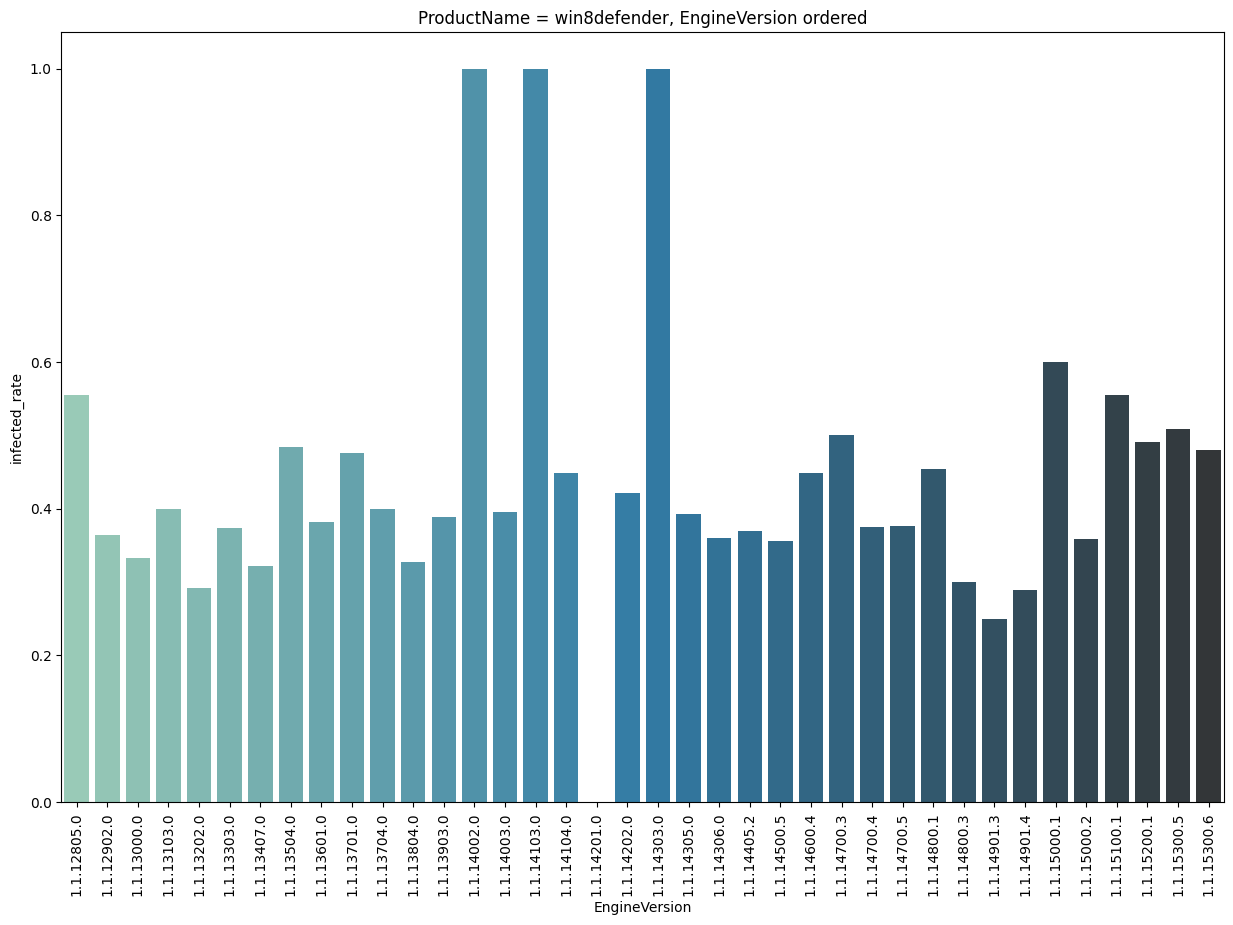

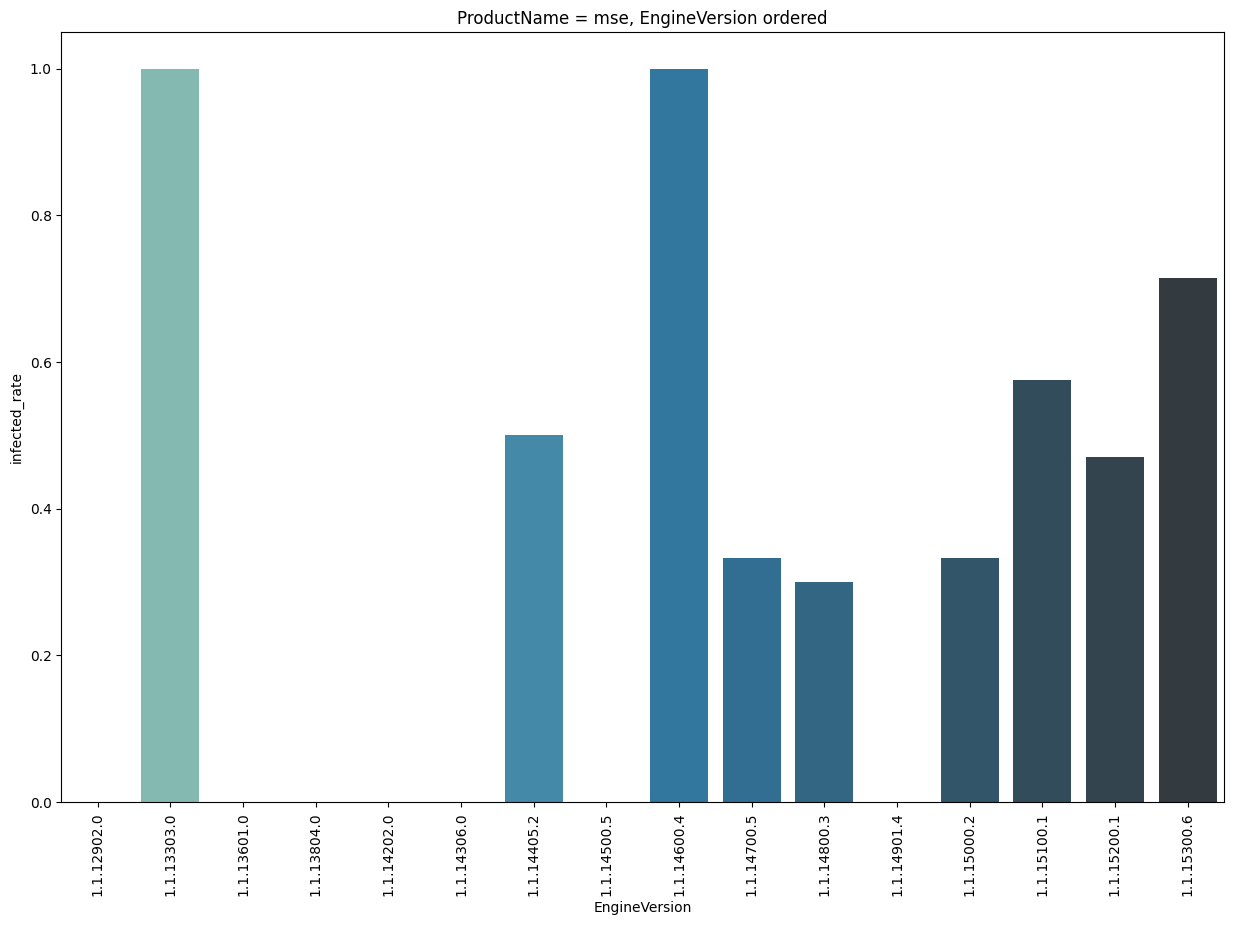

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np

# Load the dataset

train_df = pd.read_csv('/content/gdrive/MyDrive/Year 3/Project/Dataset/microsoft-malware-prediction/train.csv', dtype=dtypes, nrows=50000)

def category_and_version(category_col, version_col, df):
    # Filter out unwanted categories from category_col
    unwanted_categories = ["scep", "fep", "mseprerelease", "windowsintune"]
    df = df[~df[category_col].isin(unwanted_categories)]
    
    aux = df[[category_col, 'HasDetections']].groupby(category_col).agg(['sum', 'count'])
    aux['infected_rate'] = aux['HasDetections']['sum'] / aux['HasDetections']['count']
    aux['sum'] = aux['HasDetections']['sum']
    aux['count'] = aux['HasDetections']['count']
    aux = aux[['infected_rate', 'sum', 'count']].reset_index().sort_values('infected_rate', ascending=False)        
    
    category_vals = aux[category_col]
    
    print(aux)
    
    gc.collect()
    
    aux1 = df[[version_col, category_col, 'HasDetections']]
    
    for i_cat in category_vals:
        aux = aux1[aux1[category_col] == i_cat]
        ordered_levels = np.sort(np.unique(aux[version_col]))
        
        # Check if ordered_levels has at least one value
        if len(ordered_levels) == 0:
            continue

        aux = aux[[version_col, 'HasDetections']].groupby(version_col).agg(['sum','count'])
        aux['infected_rate'] = aux['HasDetections']['sum'] / aux['HasDetections']['count']
        aux['sum'] = aux['HasDetections']['sum']
        aux['count'] = aux['HasDetections']['count']
        aux = aux[['infected_rate', 'sum', 'count']].reset_index()

        sns.utils.plt.figure(figsize=(15, 10))
        ax = sns.barplot(x=version_col, y='infected_rate', palette="YlGnBu_d", 
                           data=aux, order=ordered_levels)
        ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
        ax.set_title(category_col + ' = ' + str(i_cat) + ', ' + str(version_col) + ' ordered')
        sns.utils.plt.show()

category_and_version('ProductName', 'EngineVersion', train_df)

#Logistic regression

Accuracy: 0.506


Confusion matrix:
 [[  0 494]
 [  0 506]]


Classification report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       494
           1       0.51      1.00      0.67       506

    accuracy                           0.51      1000
   macro avg       0.25      0.50      0.34      1000
weighted avg       0.26      0.51      0.34      1000

Classification report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       494
           1       0.51      1.00      0.67       506

    accuracy                           0.51      1000
   macro avg       0.25      0.50      0.34      1000
weighted avg       0.26      0.51      0.34      1000

Precision: 0.51
Recall: 1.00
F1-score: 0.67


ROC curve (AUC = 0.50):


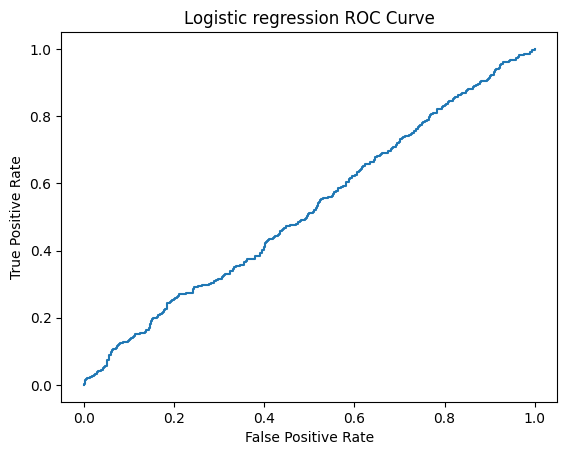

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score

# Load the dataset
data = pd.read_csv('/content/gdrive/MyDrive/Year 3/Project/Dataset/microsoft-malware-prediction/train.csv', nrows=5000)

# Drop 'MachineIdentifier' column
data = data.drop('MachineIdentifier', axis=1)

# Handle missing values for non-categorical columns
numeric_columns = data.select_dtypes(include=['number']).columns
data[numeric_columns] = data[numeric_columns].fillna(-1)

# Handle missing values for categorical columns
categorical_columns = ['ProductName', 'EngineVersion', 'AppVersion', 'AvSigVersion', 'Platform', 'Processor', 'OsVer',
                       'OsPlatformSubRelease', 'OsBuildLab', 'SkuEdition', 'PuaMode', 'SmartScreen', 'Census_MDC2FormFactor',
                       'Census_DeviceFamily', 'Census_ProcessorClass', 'Census_PrimaryDiskTypeName', 'Census_ChassisTypeName',
                       'Census_PowerPlatformRoleName', 'Census_InternalBatteryType', 'Census_OSVersion', 'Census_OSArchitecture',
                       'Census_OSBranch', 'Census_OSEdition', 'Census_OSSkuName', 'Census_OSInstallTypeName',
                       'Census_OSWUAutoUpdateOptionsName', 'Census_GenuineStateName', 'Census_ActivationChannel', 'Census_FlightRing']
for col in categorical_columns:
    data[col] = data[col].fillna(data[col].mode().iloc[0])

# Encode categorical columns using LabelEncoder
encoder = LabelEncoder()
for col in categorical_columns:
    data[col] = encoder.fit_transform(data[col].astype(str))

# Split the data into training and testing sets
X = data.drop('HasDetections', axis=1)
y = data['HasDetections']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Make predictions on the test set
y_pred = model.predict(X_test)
print ("\n")
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm)
print ("\n")

# Compute the classification report
report = classification_report(y_test, y_pred, zero_division=0)
print("Classification report:\n", report)

# Compute the classification report
report = classification_report(y_test, y_pred, zero_division=0)
print("Classification report:\n", report)

# Compute precision, recall and F1-score separately
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1))

print ("\n")
# Compute the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
auc = roc_auc_score(y_test, y_pred)
print("ROC curve (AUC = {:.2f}):".format(auc))
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic regression ROC Curve")
plt.show()

Accuracy: 0.506
Accuracy: 0.605
Confusion matrix:
 [[299 195]
 [200 306]]
Classification report:
               precision    recall  f1-score   support

           0       0.60      0.61      0.60       494
           1       0.61      0.60      0.61       506

    accuracy                           0.60      1000
   macro avg       0.60      0.61      0.60      1000
weighted avg       0.61      0.60      0.61      1000

ROC curve (AUC = 0.61):


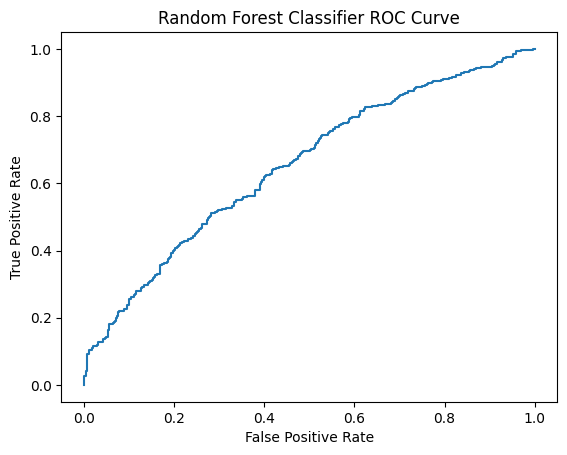

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score

# Load the dataset
data = pd.read_csv('/content/gdrive/MyDrive/Year 3/Project/Dataset/microsoft-malware-prediction/train.csv', nrows=5000)

# Drop 'MachineIdentifier' column
data = data.drop('MachineIdentifier', axis=1)

# Handle missing values for non-categorical columns
numeric_columns = data.select_dtypes(include=['number']).columns
data[numeric_columns] = data[numeric_columns].fillna(-1)

# Handle missing values for categorical columns
categorical_columns = ['ProductName', 'EngineVersion', 'AppVersion', 'AvSigVersion', 'Platform', 'Processor', 'OsVer',
                       'OsPlatformSubRelease', 'OsBuildLab', 'SkuEdition', 'PuaMode', 'SmartScreen', 'Census_MDC2FormFactor',
                       'Census_DeviceFamily', 'Census_ProcessorClass', 'Census_PrimaryDiskTypeName', 'Census_ChassisTypeName',
                       'Census_PowerPlatformRoleName', 'Census_InternalBatteryType', 'Census_OSVersion', 'Census_OSArchitecture',
                       'Census_OSBranch', 'Census_OSEdition', 'Census_OSSkuName', 'Census_OSInstallTypeName',
                       'Census_OSWUAutoUpdateOptionsName', 'Census_GenuineStateName', 'Census_ActivationChannel', 'Census_FlightRing']
for col in categorical_columns:
    data[col] = data[col].fillna(data[col].mode().iloc[0])

# Encode categorical columns using LabelEncoder
encoder = LabelEncoder()
for col in categorical_columns:
    data[col] = encoder.fit_transform(data[col].astype(str))

# Split the data into training and testing sets
X = data.drop('HasDetections', axis=1)
y = data['HasDetections']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Make predictions on the test set
y_pred = best_rf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm)

# Compute the classification report
report = classification_report(y_test, y_pred)
print("Classification report:\n", report)

# Compute the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, best_rf.predict_proba(X_test)[:,1])
auc = roc_auc_score(y_test, y_pred)
print("ROC curve (AUC = {:.2f}):".format(auc))
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest Classifier ROC Curve")
plt.show()

#RandomForestClassifier - gridsearch CV

##No longer required - found the optimal paramiters and adjusted it below

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Create a RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Define the hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Train the model with the best hyperparameters
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_rf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(grid_search.best_params_)
print(grid_search.best_score_)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


KeyboardInterrupt: ignored

#Random Forest Classifier

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Accuracy: 0.605
Confusion matrix:
 [[299 195]
 [200 306]]
Classification report:
               precision    recall  f1-score   support

           0       0.60      0.61      0.60       494
           1       0.61      0.60      0.61       506

    accuracy                           0.60      1000
   macro avg       0.60      0.61      0.60      1000
weighted avg       0.61      0.60      0.61      1000

ROC curve (AUC = 0.61):


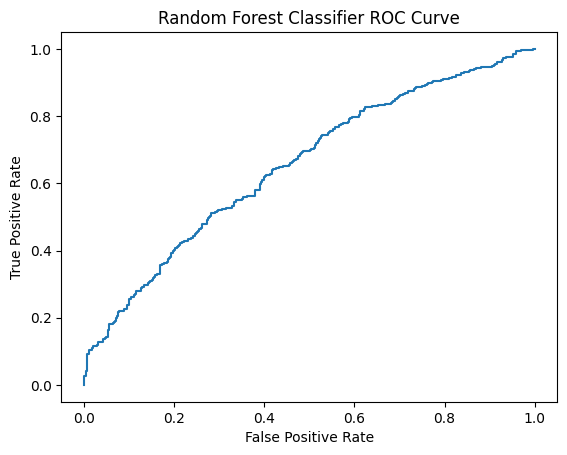

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Create a RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Define the hyperparameters to search
param_grid = {
    'n_estimators': [200],
    'max_depth': [30],
    'min_samples_split': [2],
    'min_samples_leaf': [4]
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Train the model with the best hyperparameters
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_rf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm)

# Compute the classification report
report = classification_report(y_test, y_pred)
print("Classification report:\n", report)

# Compute the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, best_rf.predict_proba(X_test)[:,1])
auc = roc_auc_score(y_test, y_pred)
print("ROC curve (AUC = {:.2f}):".format(auc))
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest Classifier ROC Curve")
plt.show()

#old

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Accuracy: 0.605


{'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
0.6297468295109759


Accuracy: 0.605


Confusion matrix:
 [[299 195]
 [200 306]]


Classification report:
               precision    recall  f1-score   support

           0       0.60      0.61      0.60       494
           1       0.61      0.60      0.61       506

    accuracy                           0.60      1000
   macro avg       0.60      0.61      0.60      1000
weighted avg       0.61      0.60      0.61      1000

ROC curve (AUC = 0.61):


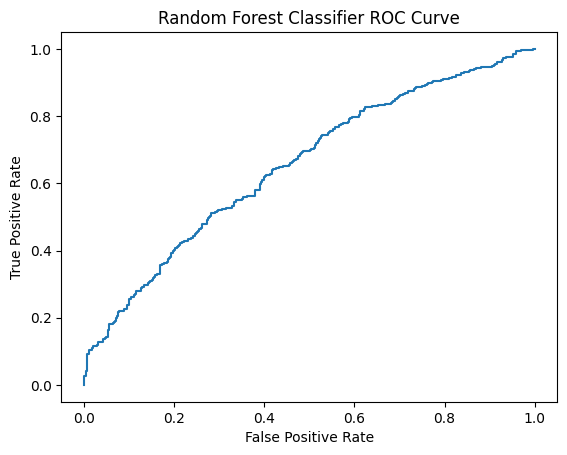

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Create a RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Define the hyperparameters to search
param_grid = {
    'n_estimators': [200],
    'max_depth': [30],
    'min_samples_split': [2],
    'min_samples_leaf': [4]
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Train the model with the best hyperparameters
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_rf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print ("\n")
print(grid_search.best_params_)
print(grid_search.best_score_)
# Make predictions on the test set
print ("\n")
y_pred = best_rf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print ("\n")

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm)
print ("\n")

# Compute the classification report
report = classification_report(y_test, y_pred)
print("Classification report:\n", report)

# Compute the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, best_rf.predict_proba(X_test)[:,1])
auc = roc_auc_score(y_test, y_pred)
print("ROC curve (AUC = {:.2f}):".format(auc))
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest Classifier ROC Curve")
plt.show()

#Decision Tree

Accuracy: 0.532
Confusion matrix:
 [[257 237]
 [231 275]]
Classification report:
               precision    recall  f1-score   support

           0       0.53      0.52      0.52       494
           1       0.54      0.54      0.54       506

    accuracy                           0.53      1000
   macro avg       0.53      0.53      0.53      1000
weighted avg       0.53      0.53      0.53      1000

ROC curve (AUC = 0.53):


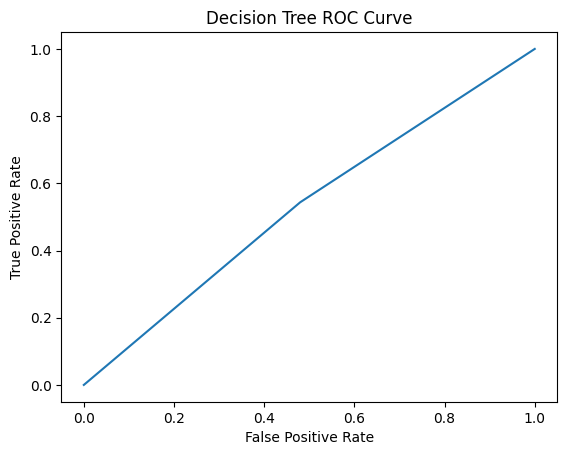

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/gdrive/MyDrive/Year 3/Project/Dataset/microsoft-malware-prediction/train.csv', nrows=5000)

# Drop 'MachineIdentifier' column
data = data.drop('MachineIdentifier', axis=1)

# Handle missing values for non-categorical columns
numeric_columns = data.select_dtypes(include=['number']).columns
data[numeric_columns] = data[numeric_columns].fillna(-1)

# Handle missing values for categorical columns
categorical_columns = ['ProductName', 'EngineVersion', 'AppVersion', 'AvSigVersion', 'Platform', 'Processor', 'OsVer',
                       'OsPlatformSubRelease', 'OsBuildLab', 'SkuEdition', 'PuaMode', 'SmartScreen', 'Census_MDC2FormFactor',
                       'Census_DeviceFamily', 'Census_ProcessorClass', 'Census_PrimaryDiskTypeName', 'Census_ChassisTypeName',
                       'Census_PowerPlatformRoleName', 'Census_InternalBatteryType', 'Census_OSVersion', 'Census_OSArchitecture',
                       'Census_OSBranch', 'Census_OSEdition', 'Census_OSSkuName', 'Census_OSInstallTypeName',
                       'Census_OSWUAutoUpdateOptionsName', 'Census_GenuineStateName', 'Census_ActivationChannel', 'Census_FlightRing']
for col in categorical_columns:
    data[col] = data[col].fillna(data[col].mode().iloc[0])

# Encode categorical columns using LabelEncoder
encoder = LabelEncoder()
for col in categorical_columns:
    data[col] = encoder.fit_transform(data[col].astype(str))

# Split the data into training and testing sets
X = data.drop('HasDetections', axis=1)
y = data['HasDetections']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a decision tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm)

# Compute the F1 score, accuracy, recall, and precision
report = classification_report(y_test, y_pred)
print("Classification report:\n", report)

# Compute the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
auc = roc_auc_score(y_test, y_pred)
print("ROC curve (AUC = {:.2f}):".format(auc))
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Decision Tree ROC Curve")
plt.show()

#SVM

Accuracy: 0.496
Confusion matrix:
 [[  0 252]
 [  0 248]]
Classification report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       252
           1       0.50      1.00      0.66       248

    accuracy                           0.50       500
   macro avg       0.25      0.50      0.33       500
weighted avg       0.25      0.50      0.33       500

ROC curve (AUC = 0.50):


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


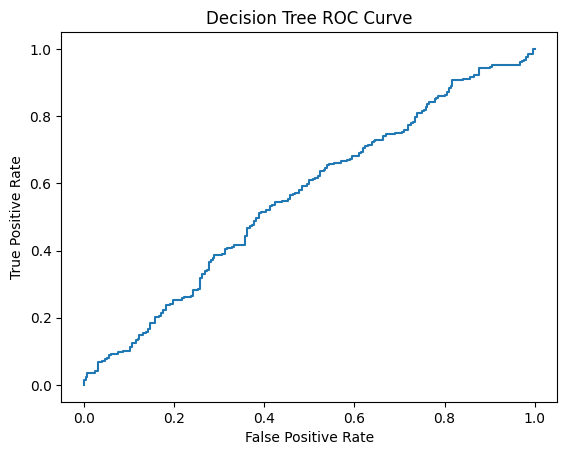

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv('/content/gdrive/MyDrive/Year 3/Project/Dataset/microsoft-malware-prediction/train.csv', nrows=2500)

# Drop 'MachineIdentifier' column
data = data.drop('MachineIdentifier', axis=1)

# Handle missing values for non-categorical columns
numeric_columns = data.select_dtypes(include=['number']).columns
data[numeric_columns] = data[numeric_columns].fillna(-1)

# Handle missing values for categorical columns
categorical_columns = ['ProductName', 'EngineVersion', 'AppVersion', 'AvSigVersion', 'Platform', 'Processor', 'OsVer',
                       'OsPlatformSubRelease', 'OsBuildLab', 'SkuEdition', 'PuaMode', 'SmartScreen', 'Census_MDC2FormFactor',
                       'Census_DeviceFamily', 'Census_ProcessorClass', 'Census_PrimaryDiskTypeName', 'Census_ChassisTypeName',
                       'Census_PowerPlatformRoleName', 'Census_InternalBatteryType', 'Census_OSVersion', 'Census_OSArchitecture',
                       'Census_OSBranch', 'Census_OSEdition', 'Census_OSSkuName', 'Census_OSInstallTypeName',
                       'Census_OSWUAutoUpdateOptionsName', 'Census_GenuineStateName', 'Census_ActivationChannel', 'Census_FlightRing']
for col in categorical_columns:
    data[col] = data[col].fillna(data[col].mode().iloc[0])

# Encode categorical columns using LabelEncoder
encoder = LabelEncoder()
for col in categorical_columns:
    data[col] = encoder.fit_transform(data[col].astype(str))

# Split the data into training and testing sets
X = data.drop('HasDetections', axis=1)
y = data['HasDetections']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an SVM model
svm_model = SVC(kernel='rbf', random_state=42, probability=True)
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Compute the confusion matrix
# Only shows 2 values as SVM model only predicts 2
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm)

# Compute the F1 score, accuracy, recall, and precision
report = classification_report(y_test, y_pred)
print("Classification report:\n", report)

# Compute the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
auc = roc_auc_score(y_test, y_pred)
print("ROC curve (AUC = {:.2f}):".format(auc))
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Decision Tree ROC Curve")
plt.show()

#Majority voting

Accuracy: 0.532
Confusion matrix:
 [[257 237]
 [231 275]]
Classification report:
               precision    recall  f1-score   support

           0       0.53      0.52      0.52       494
           1       0.54      0.54      0.54       506

    accuracy                           0.53      1000
   macro avg       0.53      0.53      0.53      1000
weighted avg       0.53      0.53      0.53      1000

ROC curve (AUC = 0.53):


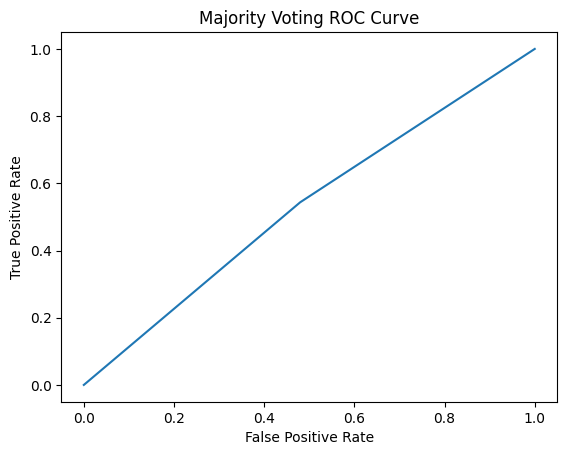

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv('/content/gdrive/MyDrive/Year 3/Project/Dataset/microsoft-malware-prediction/train.csv', nrows=5000)

# Drop 'MachineIdentifier' column
data = data.drop('MachineIdentifier', axis=1)

# Handle missing values for non-categorical columns
numeric_columns = data.select_dtypes(include=['number']).columns
data[numeric_columns] = data[numeric_columns].fillna(-1)

# Handle missing values for categorical columns
categorical_columns = ['ProductName', 'EngineVersion', 'AppVersion', 'AvSigVersion', 'Platform', 'Processor', 'OsVer',
                       'OsPlatformSubRelease', 'OsBuildLab', 'SkuEdition', 'PuaMode', 'SmartScreen', 'Census_MDC2FormFactor',
                       'Census_DeviceFamily', 'Census_ProcessorClass', 'Census_PrimaryDiskTypeName', 'Census_ChassisTypeName',
                       'Census_PowerPlatformRoleName', 'Census_InternalBatteryType', 'Census_OSVersion', 'Census_OSArchitecture',
                       'Census_OSBranch', 'Census_OSEdition', 'Census_OSSkuName', 'Census_OSInstallTypeName',
                       'Census_OSWUAutoUpdateOptionsName', 'Census_GenuineStateName', 'Census_ActivationChannel', 'Census_FlightRing']
for col in categorical_columns:
    data[col] = data[col].fillna(data[col].mode().iloc[0])

# Encode categorical columns using LabelEncoder
encoder = LabelEncoder()
for col in categorical_columns:
    data[col] = encoder.fit_transform(data[col].astype(str))

# Split the data into training and testing sets
X = data.drop('HasDetections', axis=1)
y = data['HasDetections']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a decision tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm)

# Compute the F1 score, accuracy, recall, and precision
report = classification_report(y_test, y_pred)
print("Classification report:\n", report)

# Compute the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
auc = roc_auc_score(y_test, y_pred)
print("ROC curve (AUC = {:.2f}):".format(auc))
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Majority Voting ROC Curve")
plt.show()

#Old code - no longer required

In [ ]:
#import tensorflow as tf
#import pandas as pd
#import numpy as np
#from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
#from sklearn.model_selection import train_test_split

### Load the dataset
#train_df = pd.read_csv('/content/gdrive/MyDrive/Year 3/Project/Dataset/microsoft-malware-prediction/train.csv', dtype=dtypes, nrows=1000000)

#dtypes = {
#        'MachineIdentifier':                                    'category',
#        'ProductName':                                          'category',
#        'EngineVersion':                                        'category',
#        'AppVersion':                                           'category',
#        'AvSigVersion':                                         'category',
#        'IsBeta':                                               'int8',
#        'RtpStateBitfield':                                     'float16',
#        'IsSxsPassiveMode':                                     'int8',
#        'DefaultBrowsersIdentifier':                            'float16',
#        'AVProductStatesIdentifier':                            'float32',
#        'AVProductsInstalled':                                  'float16',
#        'AVProductsEnabled':                                    'float16',
#        'HasTpm':                                               'int8',
#        'CountryIdentifier':                                    'int16',
#        'CityIdentifier':                                       'float32',
#        'OrganizationIdentifier':                               'float16',
#        'GeoNameIdentifier':                                    'float16',
#        'LocaleEnglishNameIdentifier':                          'int8',
#        'Platform':                                             'category',
#        'Processor':                                            'str',
#        'OsVer':                                                'category',
#        'OsBuild':                                              'int16',
#        'OsSuite':                                              'int16',
#        'OsPlatformSubRelease':                                 'category',
#        'OsBuildLab':                                           'category',
#        'SkuEdition':                                           'category',
#        'IsProtected':                                          'float16',
#        'AutoSampleOptIn':                                      'int8',
#        'PuaMode':                                              'category',
#        'SMode':                                                'float16',
#        'IeVerIdentifier':                                      'float16',
#        'SmartScreen':                                          'category',
#        'Firewall':                                             'float16',
#        'UacLuaenable':                                         'float32',
#        'Census_MDC2FormFactor':                                'category',
#        'Census_DeviceFamily':                                  'category',
#        'Census_OEMNameIdentifier':                             'float16',
#        'Census_OEMModelIdentifier':                            'float32',
#        'Census_ProcessorCoreCount':                            'float16',
#        'Census_ProcessorManufacturerIdentifier':               'float16',
#        'Census_ProcessorModelIdentifier':                      'float16',
#        'Census_ProcessorClass':                                'category',
#        'Census_PrimaryDiskTotalCapacity':                      'float32',
#        'Census_PrimaryDiskTypeName':                           'category',
#        'Census_SystemVolumeTotalCapacity':                     'float32',
#        'Census_HasOpticalDiskDrive':                           'int8',
#        'Census_TotalPhysicalRAM':                              'float32',
#        'Census_ChassisTypeName':                               'category',
#        'Census_InternalPrimaryDiagonalDisplaySizeInInches':    'float16',
#        'Census_InternalPrimaryDisplayResolutionHorizontal':    'float16',
#        'Census_InternalPrimaryDisplayResolutionVertical':      'float16',
#        'Census_PowerPlatformRoleName':                         'category',
#        'Census_InternalBatteryType':                           'category',
#        'Census_InternalBatteryNumberOfCharges':                'float32',
#        'Census_OSVersion':                                     'category',
#        'Census_OSArchitecture':                                'str',
#        'Census_OSBranch':                                      'category',
#        'Census_OSBuildNumber':                                 'int16',
#        'Census_OSBuildRevision':                               'int32',
#        'Census_OSEdition':                                     'category',
#        'Census_OSSkuName':                                     'category',
#        'Census_OSInstallTypeName':                             'category',
#        'Census_OSInstallLanguageIdentifier':                   'float16',
#        'Census_OSUILocaleIdentifier':                          'int16',
#        'Census_OSWUAutoUpdateOptionsName':                     'category',
#        'Census_IsPortableOperatingSystem':                     'int8',
#        'Census_GenuineStateName':                              'category',
#        'Census_ActivationChannel':                             'category',
#        'Census_IsFlightingInternal':                           'float16',
#        'Census_IsFlightsDisabled':                             'float16',
#        'Census_FlightRing':                                    'category',
#        'Census_ThresholdOptIn':                                'float16',
#        'Census_FirmwareManufacturerIdentifier':                'float16',
#        'Census_FirmwareVersionIdentifier':                     'float32',
#        'Census_IsSecureBootEnabled':                           'int8',
#        'Census_IsWIMBootEnabled':                              'float16',
#        'Census_IsVirtualDevice':                               'float16',
#        'Census_IsTouchEnabled':                                'int8',
#        'Census_IsPenCapable':                                  'int8',
#        'Census_IsAlwaysOnAlwaysConnectedCapable':              'float16',
#        'Wdft_IsGamer':                                         'float16',
#        'Wdft_RegionIdentifier':                                'float16',
#        'HasDetections':                                        'int8'
#        }

### Preprocess the data
#X = train_df.drop(['HasDetections'], axis=1)
#y = train_df['HasDetections']

### Split the dataset into training and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Train a logistic regression model
#model = LogisticRegression(random_state=42)
#model.fit(X_train, y_train)

### Make predictions on the test set
#y_pred = model.predict(X_test)

### Compute the confusion matrix
#cm = confusion_matrix(y_test, y_pred)
#print("Confusion matrix:\n", cm)

### Compute the F1 score, accuracy, recall, and precision
#report = classification_report(y_test, y_pred)
#print("Classification report:\n", report)

### Compute the ROC curve and AUC score
#fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
#auc = roc_auc_score(y_test, y_pred)
#print("ROC curve (AUC = {:.2f}):".format(auc))
#plt.plot(fpr, tpr)
#plt.xlabel("False Positive Rate")
#plt.ylabel("True Positive Rate")
#plt.title("ROC Curve")
#plt.show()